![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

## Load dataset

In [98]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


## Dataset summary

In [99]:
### Convert sex to numerical type
penguins_df['sex'].replace('FEMALE', 0, inplace=True)
penguins_df['sex'].replace('MALE', 1, inplace=True)

penguins_df['sex'] = penguins_df['sex'].astype(int)

### Numerical summary
print(penguins_df.describe())

### Dataset info
print(penguins_df.info())

### Standarize values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(penguins_df)
penguins_scaled = pd.DataFrame(data=X_scaled,columns=penguins_df.columns)
print(penguins_scaled.head())

       culmen_length_mm  culmen_depth_mm  ...  body_mass_g         sex
count        332.000000       332.000000  ...   332.000000  332.000000
mean          44.021084        17.153012  ...  4206.475904    0.503012
std            5.452462         1.960275  ...   806.361278    0.500746
min           32.100000        13.100000  ...  2700.000000    0.000000
25%           39.500000        15.600000  ...  3550.000000    0.000000
50%           44.700000        17.300000  ...  4025.000000    1.000000
75%           48.625000        18.700000  ...  4781.250000    1.000000
max           59.600000        21.500000  ...  6300.000000    1.000000

[8 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    flo

## Inertia - Clustering quality

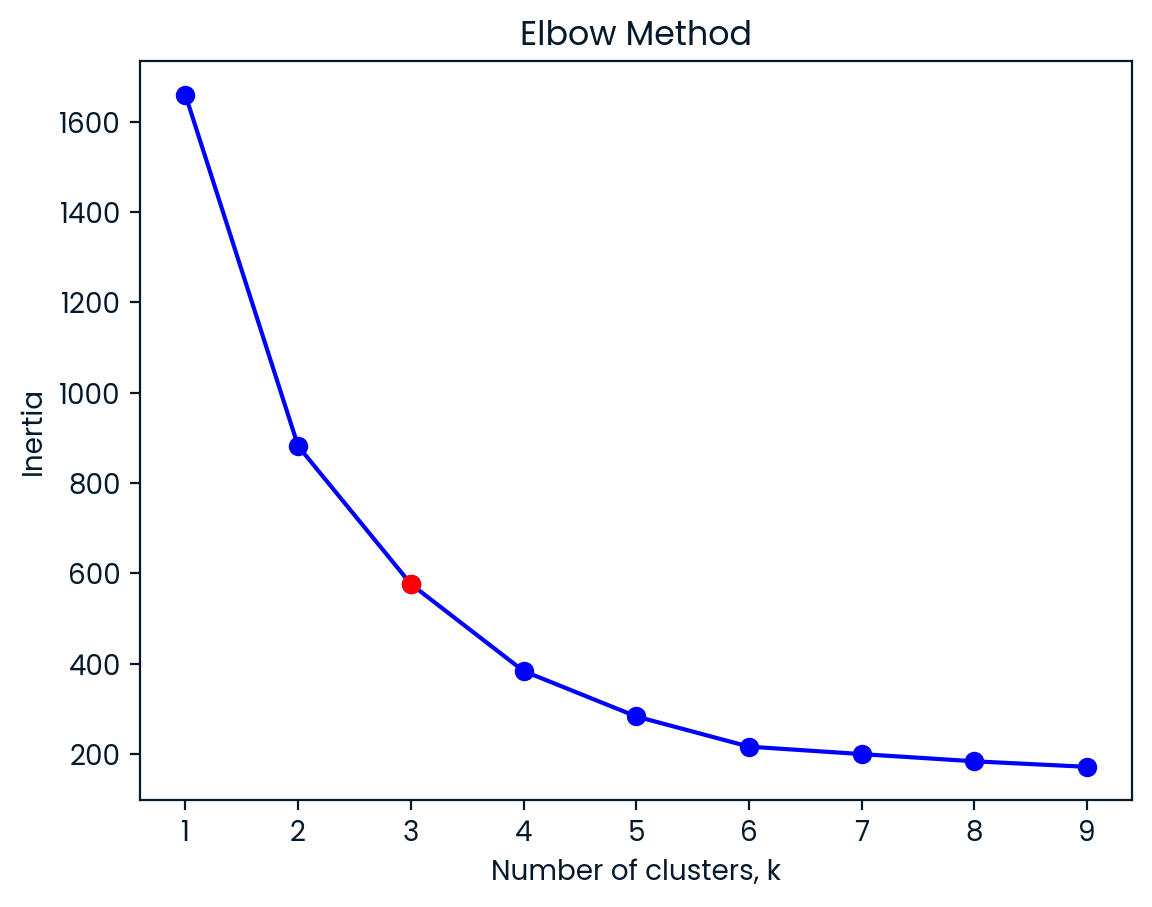

In [100]:
ks = range(1, 10)
inertias = []

for k in ks:
    
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=11)
    
    # Fit model to samples
    model.fit(penguins_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias

inertia_highlight = inertias[ks.index(3)]
plt.scatter([3], [inertia_highlight], color='r', zorder=5, label='k=3')

plt.plot(ks, inertias, '-o', c="b")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(ks)
plt.show()

**Conclusion**: From the inertia plot, 3 clusters is the best solution.

## K-means application

In [101]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3, random_state=11)

# Fit model to points
model.fit(penguins_scaled)
penguins_df['labels'] = model.labels_

## Plot K-means results
I selected _culmen_depth_mm_ and _body_mass_g_ for the plot. But I could have selected other results.

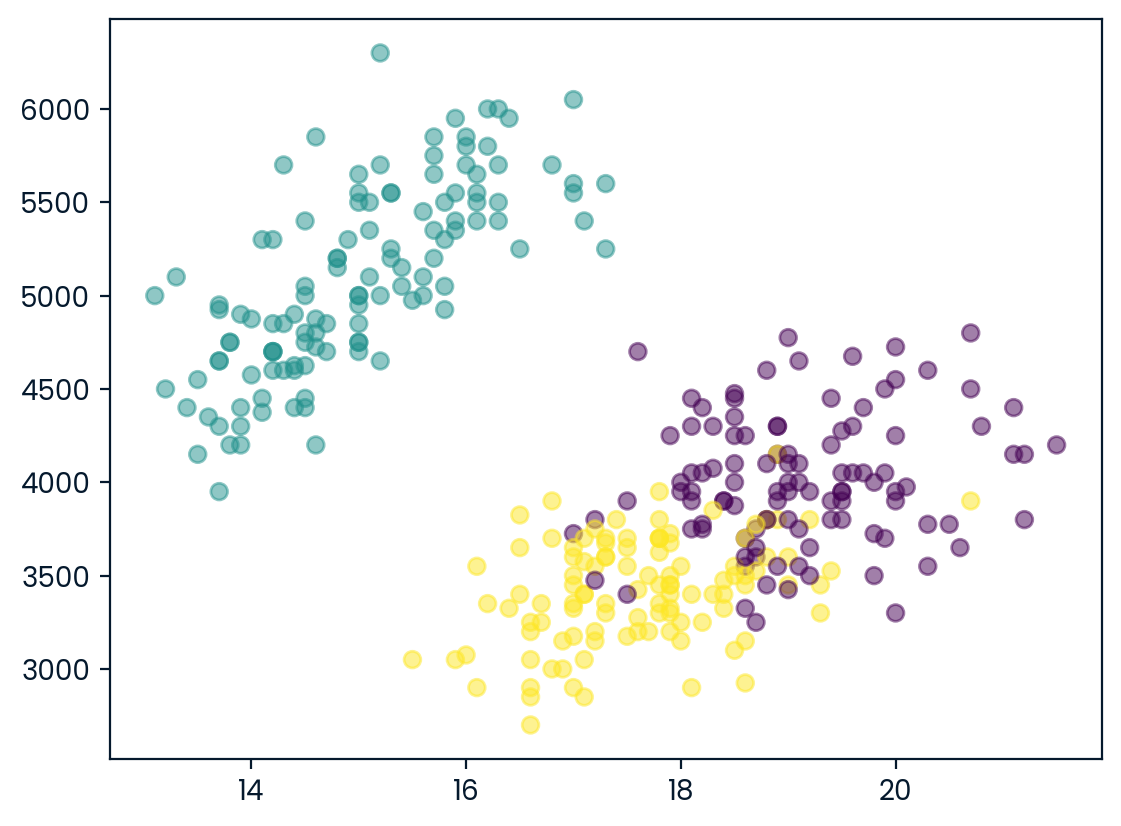

In [102]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(penguins_df["culmen_depth_mm"], penguins_df["body_mass_g"], c=penguins_df["labels"], alpha=0.5)

## Extract the cluster centroids

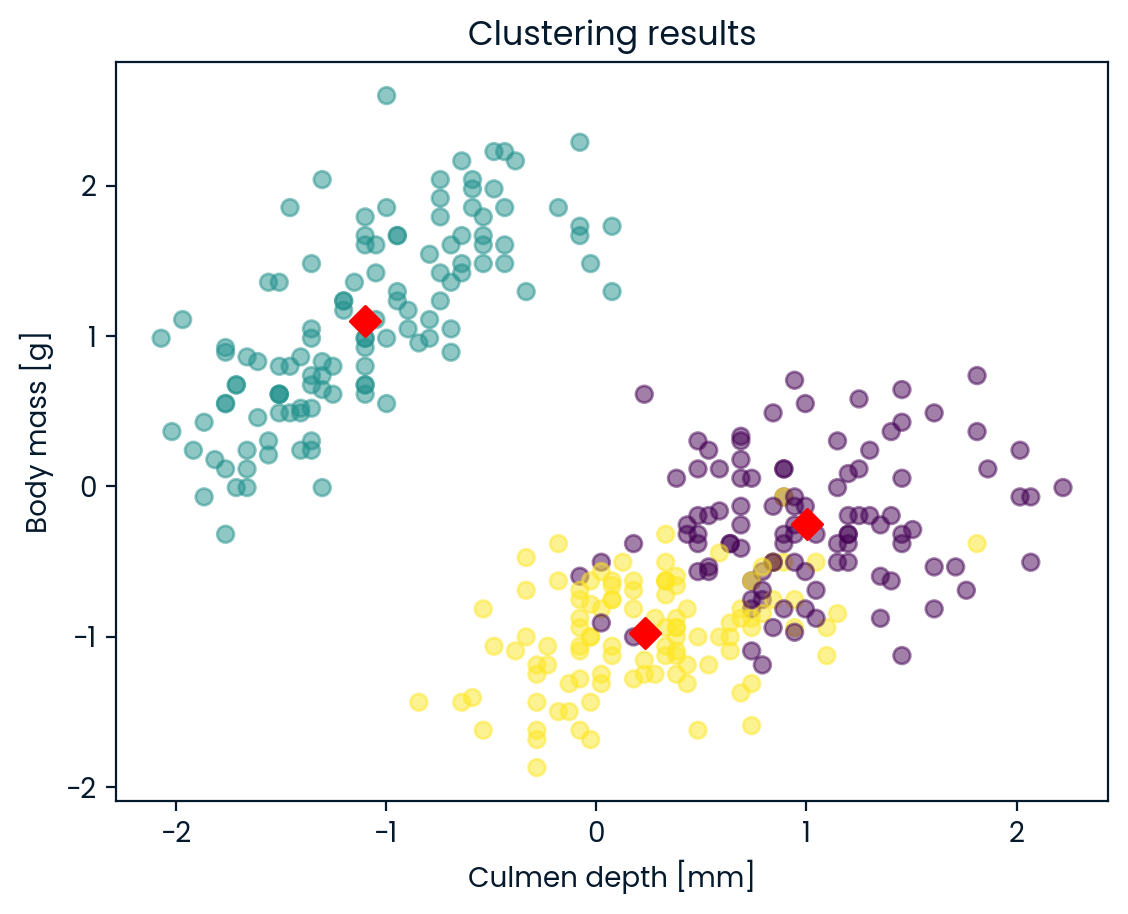

        culmen_length_mm  culmen_depth_mm  ...  body_mass_g       sex
labels                                     ...                       
0              43.878302        19.111321  ...  4006.603774  1.000000
1              47.568067        14.996639  ...  5092.436975  0.512605
2              40.217757        17.611215  ...  3419.158879  0.000000

[3 rows x 5 columns]


In [103]:
# Assign the cluster centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,1]
centroids_y = centroids[:,3]

# Standardize the x and y data
scaled_culmen_depth = scaler.fit_transform(penguins_df[["culmen_depth_mm"]])
scaled_body_mass = scaler.fit_transform(penguins_df[["body_mass_g"]])

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(scaled_culmen_depth, scaled_body_mass, c=penguins_df["labels"], alpha=0.5)
plt.scatter(centroids_x, centroids_y, marker="D", c='red', s=60)  # Fixed color for centroids
plt.xlabel('Culmen depth [mm]')
plt.ylabel('Body mass [g]')
plt.title('Clustering results')
plt.show()

### Final results
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'labels']
stat_penguins = penguins_df[numeric_columns].groupby('labels').mean()
print(stat_penguins)
